In [22]:
import glob
import scipy.stats
import numpy as np
import pickle
import os
from collections import defaultdict

from itertools import combinations
from scipy import spatial
from metrics import rsa
from data import one_hot
from tqdm import tqdm_notebook

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
   
# plot code
def plot_results(result, metric, title=None):
    
    
    fig, ax = plt.subplots(figsize=(15,8))
    
    index = np.arange(16)

    bar_width = 0.4
    opacity = 0.7
    
    agents = []
    values = defaultdict(list)

    for s in list(result[metric].keys()):  
        
        # check if list is not empty
        if not list(result[metric][s].keys()):
            continue

        for agent in sorted(list(result[metric][s].keys())):
            agents.append(agent)
            values[agent].append(result[metric][s][agent])

    avg = {}
    # get all averages
    for it in values.keys():
        avg[it] = np.mean(values[it])
    
    std = {}
    # get standard deviation for every iteration
    for it in values.keys():
        std[it] = np.std(values[it])

    # plot the bar
    plt.bar(index + bar_width, avg.values(), bar_width,
            yerr=std.values(),
            alpha=opacity,
            error_kw=dict(lw=1, capsize=2, capthick=1))
        

    plt.ylabel('RSA')
    plt.title('Cross-seed RSA cee')
    plt.xlabel('Agent')
        
    plt.show()



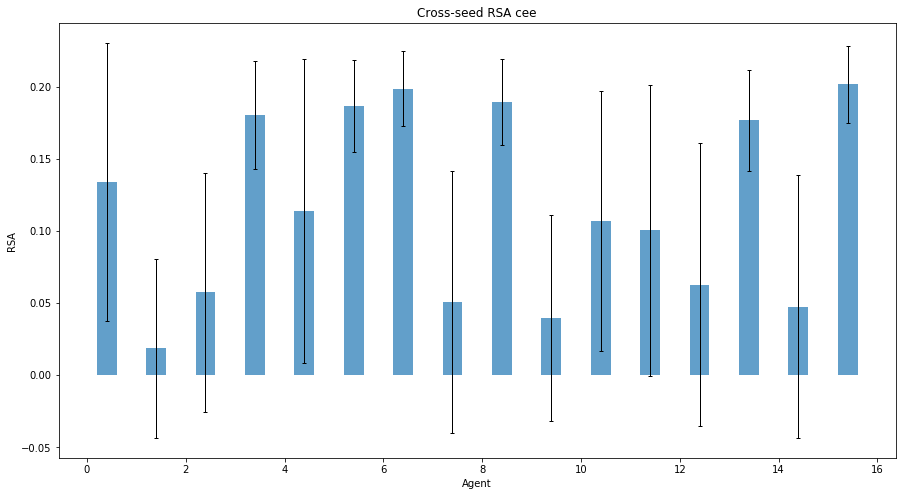

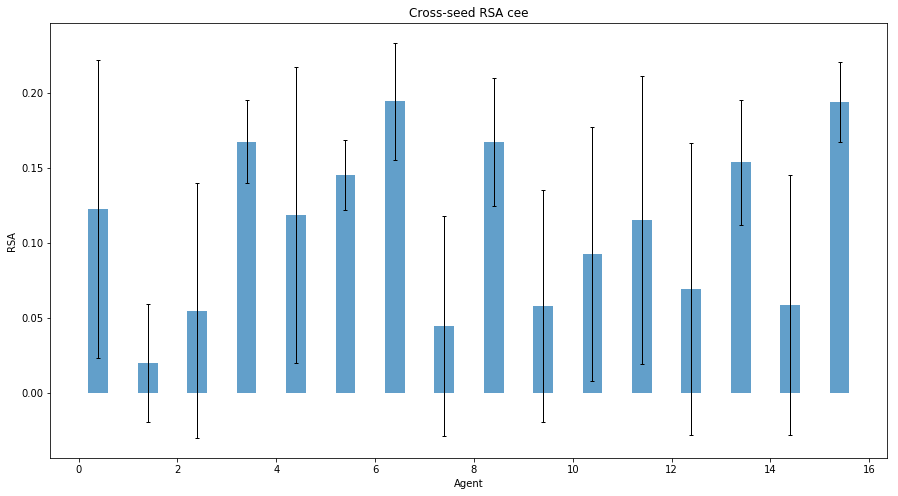

In [53]:
RSA_BASELINE = pickle.load(open(f'cee_messages/cross_rsa_analysis.pkl', 'rb'))

RSA_ANALYSIS = {'baseline': RSA_BASELINE}

for k in RSA_BASELINE:
    if k == "ham_messages":
        plot_results(RSA_BASELINE, metric=k, title="Messages (hamming distance)")
    elif k == "lev_messages":
        plot_results(RSA_BASELINE, metric=k, title="Messages (Levenshtein distance)")

In [68]:
   
# plot code
def plot_results(result, metric, title=None):
    
    
    fig, ax = plt.subplots(figsize=(15,8))
    
    index = np.arange(5)

    bar_width = 0.4
    opacity = 0.7
    
    agents = []
    values = defaultdict(list)

#     for s in list(result[metric].keys()):  
        
#         # check if list is not empty
#         if not list(result[metric][s].keys()):
#             continue

#         values[agent].append(result[metric][s][agent])

    avg = {}
    # get all averages
    for it in result[metric].keys():
        avg[it] = np.mean(result[metric][it])
    
    std = {}
    # get standard deviation for every iteration
    for it in result[metric].keys():
        std[it] = np.std(result[metric][it])
    
    print(avg)
    print(std)
    
    # plot the bar
    plt.bar(index + bar_width, avg.values(), bar_width,
            yerr=std.values(),
            alpha=opacity,
            error_kw=dict(lw=1, capsize=2, capthick=1))
        

    plt.ylabel('RSA')
    plt.title('Within agents RSA cee')
    plt.xlabel('Seed')
        
    plt.show()


{'1': 0.31747612570975053, '2': 0.40408032687293616, '3': 0.3635915546538692, '4': 0.3892741974334414, '42': 0.31377190607575545}
{'1': 0.2866697065628941, '2': 0.29277578859661274, '3': 0.2714353600359677, '4': 0.28496812692094386, '42': 0.29018032774272107}


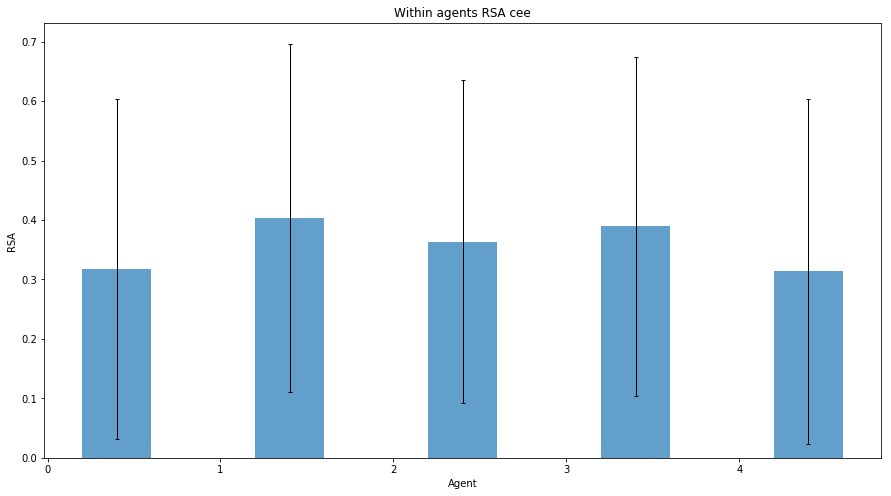

{'1': 0.3695261150260523, '2': 0.4603394714112739, '3': 0.41945380934408205, '4': 0.44912941127281475, '42': 0.34632856710163556}
{'1': 0.3370401544623552, '2': 0.34601087763618665, '3': 0.32010368632506886, '4': 0.33045757352126776, '42': 0.32167931567363156}


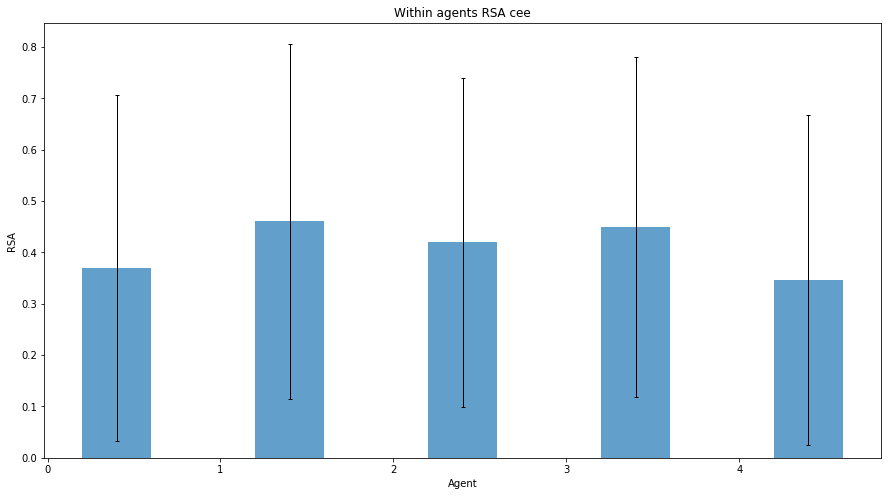

In [69]:
RSA_BASELINE = pickle.load(open(f'cee_messages/rsa_analysis.pkl', 'rb'))

RSA_ANALYSIS = {'baseline': RSA_BASELINE}

for k in RSA_BASELINE:
    if k == "ham_messages":
        plot_results(RSA_BASELINE, metric=k, title="Messages (hamming distance)")
    elif k == "lev_messages":
        plot_results(RSA_BASELINE, metric=k, title="Messages (Levenshtein distance)")